In [1]:
from dataset import dataset
from machine_learning import neural_network
from utils import utils
from preprocessing import preprocess_image
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from tensorflow.keras.utils import normalize
import os, random
import cv2
import random
import numpy as np
import sys
import argparse
from tensorflow.keras.callbacks import CSVLogger
from xai import explainable_ai
from sklearn.metrics import confusion_matrix

from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import BinaryScore, CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear, ExtractIntermediateLayer
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from matplotlib import cm
import os
from dataset import dataset
import random
from preprocessing import preprocess_image
import numpy as np
from matplotlib import pyplot as plt
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D
import tensorflow as tf

classifier = load_model("machine_learning/checkpoints/inception_v3_sigmoid_threshold_lr_3e-05_bs_20_unfrozen_4x128_LOAD_CORRECT______2")


2022-03-01 17:42:23.281075: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-01 17:42:23.281146: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-01 17:43:07.955255: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-01 17:43:07.979278: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-01 17:43:07.979320: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-01 17:43:07.979372: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running 

2022-02-24 17:48:40.269741: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-24 17:48:40.289121: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2594205000 Hz


[[0.99789906]]


2022-02-24 17:48:42.387396: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 53640600 exceeds 10% of free system memory.
2022-02-24 17:48:43.274760: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 53640600 exceeds 10% of free system memory.
2022-02-24 17:48:43.302942: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 53640600 exceeds 10% of free system memory.
2022-02-24 17:48:45.196915: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 49787136 exceeds 10% of free system memory.
2022-02-24 17:48:45.250206: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 49787136 exceeds 10% of free system memory.


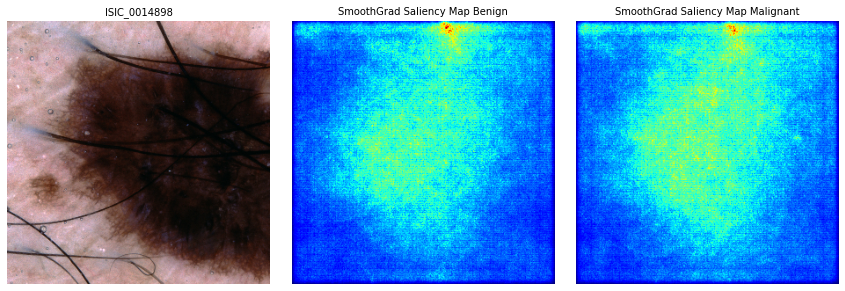

In [3]:
preprocessor = preprocess_image.Preprocessor()
preprocessor.size = (299, 299)
preprocessor.delta = 30
image = preprocessor.cv_preprocessing("dataset/ISICArchive/Classification_totali/train/benign/ISIC_0014898.jpg")

score_b = BinaryScore([0])
replace2linear = ReplaceToLinear()
saliency = Saliency(classifier, model_modifier=replace2linear, clone=True)

images = np.asarray([np.array(image)])
titles = ["ISIC_0014898"]
print(classifier.predict(images))

smoothgrad_saliency_map_b = saliency(score_b, images, smooth_samples=50, smooth_noise=0.50) # The number of calculating gradients iterations. # noise spread level.

score_m = BinaryScore([1])
smoothgrad_saliency_map_m = saliency(score_m, images, smooth_samples=50, smooth_noise=0.50) # The number of calculating gradients iterations. # noise spread level.

f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].set_title("{}".format(titles[0]), fontsize=10)
axs[0].imshow(images[0])
axs[0].axis('off')

axs[1].set_title("SmoothGrad Saliency Map Benign", fontsize=10)
axs[1].imshow(smoothgrad_saliency_map_b[0], cmap='jet')
axs[1].axis('off')

axs[2].set_title("SmoothGrad Saliency Map Malignant", fontsize=10)
axs[2].imshow(smoothgrad_saliency_map_m[0], cmap='jet')
axs[2].axis('off')

plt.tight_layout()
plt.savefig("img_for_thesis/smoothgrad_map.png")
plt.show()

2022-02-25 11:03:08.297240: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-25 11:03:08.394884: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2593915000 Hz


[[0.00114423]]


2022-02-25 11:03:10.943392: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 21456240 exceeds 10% of free system memory.
2022-02-25 11:03:11.304530: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 21456240 exceeds 10% of free system memory.
2022-02-25 11:03:11.312477: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 21456240 exceeds 10% of free system memory.
2022-02-25 11:03:12.305394: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 16868352 exceeds 10% of free system memory.
2022-02-25 11:03:12.312560: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 18643968 exceeds 10% of free system memory.


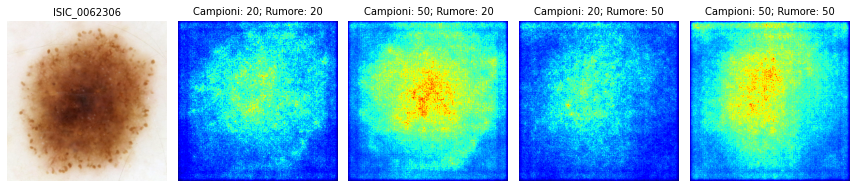

In [3]:
import random
import os

preprocessor = preprocess_image.Preprocessor()
preprocessor.size = (299, 299)
preprocessor.delta = 30

r = random.choice(os.listdir("dataset/ISICArchive/Classification_totali/train/benign/"))
image = preprocessor.cv_preprocessing("dataset/ISICArchive/Classification_totali/train/benign/"+r) #ISIC_0031246

score_b = BinaryScore([0])
replace2linear = ReplaceToLinear()
saliency = Saliency(classifier, model_modifier=replace2linear, clone=True)

images = np.asarray([np.array(image)])
titles = ["ISIC_0031246"]
print(classifier.predict(images))
smoothgrad_saliency_map_0 = saliency(score_b, images, smooth_samples=20, smooth_noise=0.20) # The number of calculating gradients iterations. # noise spread level.
smoothgrad_saliency_map_1 = saliency(score_b, images, smooth_samples=50, smooth_noise=0.20)
smoothgrad_saliency_map_2 = saliency(score_b, images, smooth_samples=20, smooth_noise=0.50)
smoothgrad_saliency_map_3 = saliency(score_b, images, smooth_samples=50, smooth_noise=0.50)
#score_m = BinaryScore([1])
#smoothgrad_saliency_map_m = saliency(score_m, images, smooth_samples=50, smooth_noise=0.20) # The number of calculating gradients iterations. # noise spread level.

f, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 4))
axs[0].set_title("{}".format(r.split(".")[0]), fontsize=10)
axs[0].imshow(images[0])
axs[0].axis('off')

axs[1].set_title("Campioni: 20; Rumore: 20", fontsize=10)
axs[1].imshow(smoothgrad_saliency_map_0[0], cmap='jet')
axs[1].axis('off')

axs[2].set_title("Campioni: 50; Rumore: 20", fontsize=10)
axs[2].imshow(smoothgrad_saliency_map_1[0], cmap='jet')
axs[2].axis('off')

axs[3].set_title("Campioni: 20; Rumore: 50", fontsize=10)
axs[3].imshow(smoothgrad_saliency_map_2[0], cmap='jet')
axs[3].axis('off')

axs[4].set_title("Campioni: 50; Rumore: 50", fontsize=10)
axs[4].imshow(smoothgrad_saliency_map_3[0], cmap='jet')
axs[4].axis('off')

plt.tight_layout()
plt.savefig("img_for_thesis/smoothgrad_map_sample_noise_variation.jpg")
plt.show()

[[0.99909645]]


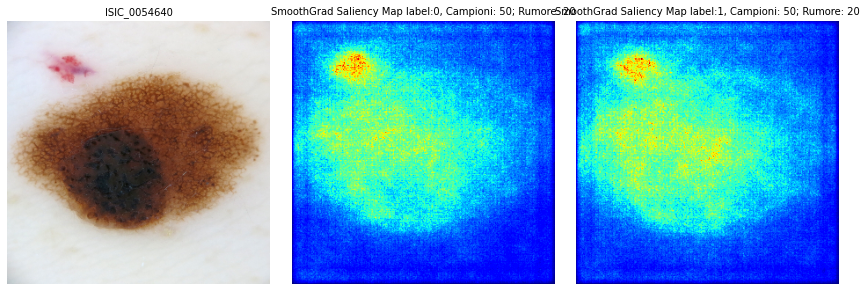

In [15]:
import random
import os

preprocessor = preprocess_image.Preprocessor()
preprocessor.size = (299, 299)
preprocessor.delta = 30

r = random.choice(os.listdir("dataset/ISICArchive/Classification_totali/train/benign/"))
image = preprocessor.cv_preprocessing("dataset/ISICArchive/Classification_totali/train/benign/"+r) #ISIC_0031246

score_b = BinaryScore([0])
replace2linear = ReplaceToLinear()
saliency = Saliency(classifier, model_modifier=replace2linear, clone=True)

images = np.asarray([np.array(image)])
titles = ["ISIC_0031246"]
print(classifier.predict(images))
smoothgrad_saliency_map_b = saliency(score_b, images, smooth_samples=50, smooth_noise=0.20) # The number of calculating gradients iterations. # noise spread level.

score_m = BinaryScore([1])
smoothgrad_saliency_map_m = saliency(score_m, images, smooth_samples=50, smooth_noise=0.20) # The number of calculating gradients iterations. # noise spread level.

f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].set_title("{}".format(r.split(".")[0]), fontsize=10)
axs[0].imshow(images[0])
axs[0].axis('off')

axs[1].set_title("SmoothGrad Saliency Map label:0, Campioni: 50; Rumore: 20", fontsize=10)
axs[1].imshow(smoothgrad_saliency_map_b[0], cmap='jet')
axs[1].axis('off')

axs[2].set_title("SmoothGrad Saliency Map label:1, Campioni: 50; Rumore: 20", fontsize=10)
axs[2].imshow(smoothgrad_saliency_map_m[0], cmap='jet')
axs[2].axis('off')

plt.tight_layout()
plt.savefig("img_for_thesis/smoothgrad_map_tn_sample_noise.png")
plt.show()

2022-03-01 17:44:13.524242: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-01 17:44:13.626657: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2594045000 Hz


[[0.00016382]]


2022-03-01 17:44:16.679495: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 53640600 exceeds 10% of free system memory.
2022-03-01 17:44:17.696399: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 53640600 exceeds 10% of free system memory.
2022-03-01 17:44:17.729883: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 53640600 exceeds 10% of free system memory.
2022-03-01 17:44:19.847429: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 16868352 exceeds 10% of free system memory.
2022-03-01 17:44:19.856234: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 18643968 exceeds 10% of free system memory.


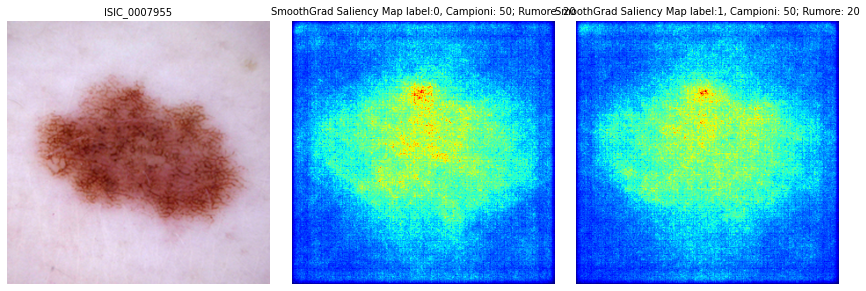

In [2]:
import random
import os

preprocessor = preprocess_image.Preprocessor()
preprocessor.size = (299, 299)
preprocessor.delta = 30

r = random.choice(os.listdir("dataset/ISICArchive/Classification_totali/train/benign/"))
image = preprocessor.cv_preprocessing("dataset/ISICArchive/Classification_totali/train/benign/ISIC_0033298.jpg")#+r) #ISIC_0031246

score_b = BinaryScore([0])
replace2linear = ReplaceToLinear()
saliency = Saliency(classifier, model_modifier=replace2linear, clone=True)

images = np.asarray([np.array(image)])
titles = ["ISIC_0031246"]
print(classifier.predict(images))
smoothgrad_saliency_map_b = saliency(score_b, images, smooth_samples=50, smooth_noise=0.20) # The number of calculating gradients iterations. # noise spread level.

score_m = BinaryScore([1])
smoothgrad_saliency_map_m = saliency(score_m, images, smooth_samples=50, smooth_noise=0.20) # The number of calculating gradients iterations. # noise spread level.

f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].set_title("{}".format(r.split(".")[0]), fontsize=10)
axs[0].imshow(images[0])
axs[0].axis('off')

axs[1].set_title("SmoothGrad Saliency Map label:0, Campioni: 50; Rumore: 20", fontsize=10)
axs[1].imshow(smoothgrad_saliency_map_b[0], cmap='jet')
axs[1].axis('off')

axs[2].set_title("SmoothGrad Saliency Map label:1, Campioni: 50; Rumore: 20", fontsize=10)
axs[2].imshow(smoothgrad_saliency_map_m[0], cmap='jet')
axs[2].axis('off')

plt.tight_layout()
plt.savefig("img_for_thesis/smoothgrad_map_tn_sample_noise_____ISIC_00332982.png")
plt.show()